(200, 3)


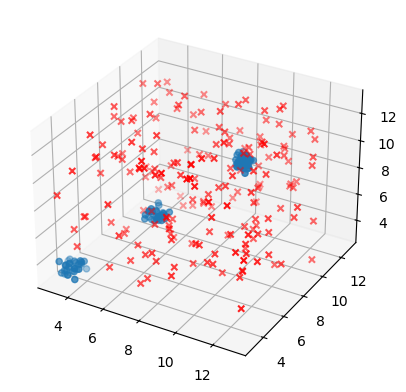

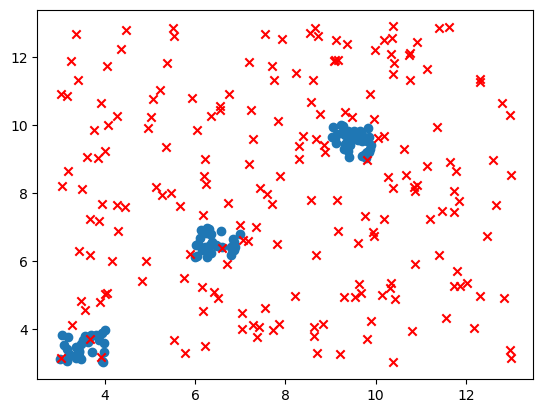

In [1]:
import numpy as np
import random

X = np.random.rand(100,3) # [N, D]
# generate X from 3 clusters
X[:30] += 3
X[30:60] += 6
X[60:] += 9

K = np.random.rand(200,3)*10+3 # [K, D]
print(K.shape)
# K = random.sample(list(X), 50) # [K, D]

# visualizing the data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])#, c=np.argmax(one_hot, axis=1))
# plot K
ax.scatter(K[:,0], K[:,1], K[:,2], c='r', marker='x')
plt.show()

# plot in 2d
plt.scatter(X[:,0], X[:,1])#, c=np.argmax(one_hot, axis=1))
plt.scatter(K[:,0], K[:,1], c='r', marker='x')
plt.show()


In [2]:
for i in range(10):
    # step 1: assign each datapoint to the closest cluster
    distance = np.sum((X[:, np.newaxis, :] -K)**2, axis=2) # [N, 1, D]-[K, D] -> [N, K], broadcasting to calculate the distance
    one_hot = np.zeros_like(distance)
    one_hot[list(range(distance.shape[0])), np.argmin(distance, axis=1)] = 1    # [N, K]

    # step 2: update the cluster centers to the mean of the assigned datapoints
    summ = np.einsum('nk,nd->kd',one_hot,X) # [K, D]
    count = np.sum(one_hot, axis=0) # [K], the problem is some counts are 0, so we need to handle them
    
    # handle the case where count is 0, we can just set the cluster center to the mean of all the data points
    avg_mask = count==0
    K_new = np.zeros_like(K)
    K_new[~avg_mask] =summ[~avg_mask]/count[~avg_mask,None]  # [K, D], where count is not 0, we can calculate the mean of the assigned data points
    K_new[avg_mask] = np.mean(K_new[~avg_mask]) # [K, D], where count is 0, we can set the cluster center to the mean of all the cluster centers

    # check if the cluster centers have converged
    if np.all(np.abs(K_new- K)) < 1e-5:
        break

    K = K_new


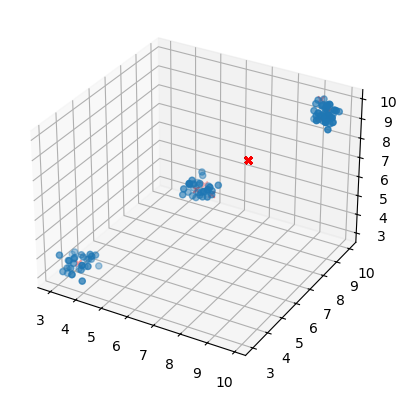

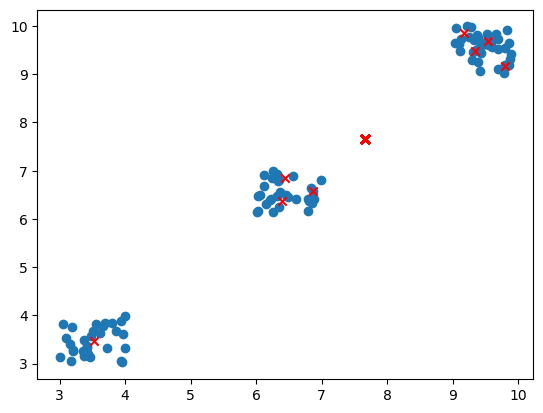

In [3]:
# visualizing the data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])#, c=np.argmax(one_hot, axis=1))
# plot K
ax.scatter(K[:,0], K[:,1], K[:,2], c='r', marker='x')
plt.show()

# plot in 2d
plt.scatter(X[:,0], X[:,1])#, c=np.argmax(one_hot, axis=1))
plt.scatter(K[:,0], K[:,1], c='r', marker='x')
plt.show()
